In [42]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [43]:
import expectexception

# Pandas

<!-- requirement: data/yelp.json.gz -->
<!-- requirement: data/PEP_2016_PEPANNRES.csv -->

In [44]:
import pandas as pd

We introduced the Pandas module and the DataFrame object in the lesson on [basic data science modules](DS_Basic_DS_Modules.ipynb). We learned how to construct a DataFrame, add data, retrieve data, and [basic reading and writing to disk](DS_IO.ipynb). Now we'll explore the DataFrame object and its powerful analysis methods in more depth.

We'll work with a data set from the online review site, Yelp. The file is stored as a compressed JSON file.

In [45]:
!ls -lh ./data/yelp.json.gz

-rw-rw-r-- 1 jovyan users 4.2M Apr 13 15:58 ./data/yelp.json.gz


In [46]:
import gzip
import simplejson as json

with gzip.open('./data/yelp.json.gz', 'r') as f:
    yelp_data = [json.loads(line) for line in f]
    
yelp_df = pd.DataFrame(yelp_data)
yelp_df.head()    

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


## Pandas DataFrame and Series

The Pandas DataFrame is a highly structured object. Each row corresponds with some physical entity or event. We think of all of the information in a given row as referring to one object (e.g. a business). Each column contains one type of data, both semantically (e.g. names, counts of reviews, star ratings) and syntactically.

In [47]:
yelp_df.dtypes

attributes        object
business_id       object
categories        object
city              object
full_address      object
hours             object
latitude         float64
longitude        float64
name              object
neighborhoods     object
open                bool
review_count       int64
stars            float64
state             object
type              object
dtype: object

We can reference the columns by name, like we would with a `dict`.

In [48]:
yelp_df['city'].head()

0      Phoenix
1    De Forest
2    De Forest
3    De Forest
4    De Forest
Name: city, dtype: object

In [49]:
type(yelp_df['city'])

pandas.core.series.Series

An individual column is a Pandas `Series`. A `Series` has a `name` and a `dtype` (similar to a NumPy array). A `DataFrame` is essentially a `dict` of `Series` objects. The `Series` has an `index` attribute, which label the rows. The index is essentially a set of keys for referencing the rows. We can have an index composed of numbers, strings, timestamps, or any hashable Python object. The index will also have homogeneous type.

In [50]:
yelp_df['city'].index

RangeIndex(start=0, stop=37938, step=1)

The `DataFrame` has an `index` given by the union of indices of its constituent `Series` (we'll explore this later in more detail). Since a `DataFrame` is a `dict` of `Series`, we can select a column and then a row using square bracket notation, but not the reverse (however, the `loc` method works around this).

In [51]:
# this works
yelp_df['city'][100]

'Madison'

In [52]:
%%expect_exception KeyError

# this doesn't
yelp_df[100]['city']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2441             try:
-> 2442                 return self._engine.get_loc(key)
   2443             except KeyError:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 100

During handling of the above exception, another exception occurred:

KeyError                                  Traceback (most recent call last)
<ipython-input-52-a719463eea94> in <module>()
      1 
      2 # this doesn't
----> 3 yelp_df[100]['city']

/opt/conda/lib/python3.6

In [53]:
yelp_df.loc[100, 'city']

'Madison'

Understanding the underlying structure of the `DataFrame` object as a `dict` of `Series` will help you avoid errors and help you think about how the `DataFrame` should behave when we begin doing more complicated analysis.

We can _aggregate_ data in a `DataFrame` using methods like `mean`, `sum`, `count`, and `std`. To view a collection of summary statistics for each column we can use the `describe` method.

In [54]:
yelp_df.describe()

,latitude,longitude,review_count,stars
count,37938.000000,37938.000000,37938.000000,37938.000000
mean,36.530288,-104.097172,29.300648,3.672914
std,5.822588,28.365375,92.893064,0.888730
min,32.876638,-115.369725,3.000000,1.000000
25%,33.476739,-115.136389,4.000000,3.000000
50%,33.680247,-112.068820,8.000000,3.500000
75%,36.141875,-111.883274,21.000000,4.500000
max,56.033777,-3.050088,4084.000000,5.000000


The utility of a DataFrame comes from its ability to split data into groups, using the `groupby` method, and then perform custom aggregations using the `apply` or `aggregate` method. This process of splitting the data into groups, applying an aggregation, and then collecting the results is [discussed in detail in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html), and is one of the main focuses of this notebook.

## DataFrame construction

Since a `DataFrame` is a `dict` of `Series`, the natural way to construct a `DataFrame` is to use a `dict` of `Series`-like objects.

In [55]:
from string import ascii_letters, digits
import numpy as np
import datetime

In [56]:
usernames = ['alice36', 'bob_smith', 'eve']

passwords = [''.join(np.random.choice(list(ascii_letters + digits), 8)) for x in range(3)]
creation_dates = [datetime.datetime.now().date() - datetime.timedelta(int(x)) for x in np.random.randint(0, 1500, 3)]

In [57]:
df = pd.DataFrame({'username': usernames, 'password': passwords, 'date-created': pd.to_datetime(creation_dates)})
df

,date-created,password,username
0,2018-08-15,xl752w4f,alice36
1,2015-09-02,ElsVGrV7,bob_smith
2,2019-05-08,t4MF7KH0,eve


In [58]:
df.dtypes

date-created    datetime64[ns]
password                object
username                object
dtype: object

The `DataFrame` is also closely related to the NumPy `ndarray`.

In [59]:
random_data = np.random.random((4,3))
random_data

array([[0.01134216, 0.87351603, 0.9666423 ],
       [0.44616565, 0.53143556, 0.04995839],
       [0.89428838, 0.5043307 , 0.98413121],
       [0.23102679, 0.02352041, 0.61911275]])

In [60]:
df_random = pd.DataFrame(random_data, columns=['a', 'b', 'c'])
df_random

,a,b,c
0,0.011342,0.873516,0.966642
1,0.446166,0.531436,0.049958
2,0.894288,0.504331,0.984131
3,0.231027,0.023520,0.619113


To add a new column or row, we simply use `dict`-like assignment.

In [61]:
emails = ['alice.chan@gmail.com', 'bwsmith1983@gmail.com', 'fakemail123@yahoo.com']
df['email'] = emails
df

,date-created,password,username,email
0,2018-08-15,xl752w4f,alice36,alice.chan@gmail.com
1,2015-09-02,ElsVGrV7,bob_smith,bwsmith1983@gmail.com
2,2019-05-08,t4MF7KH0,eve,fakemail123@yahoo.com


In [62]:
# loc references index value, NOT position
# for position use iloc
df.loc[3] = ['2015-01-29', '38uzFJ1n', 'melvintherobot', 'moviesrgood@moviesrgood.com']
df

,date-created,password,username,email
0,2018-08-15 00:00:00,xl752w4f,alice36,alice.chan@gmail.com
1,2015-09-02 00:00:00,ElsVGrV7,bob_smith,bwsmith1983@gmail.com
2,2019-05-08 00:00:00,t4MF7KH0,eve,fakemail123@yahoo.com
3,2015-01-29,38uzFJ1n,melvintherobot,moviesrgood@moviesrgood.com


We can also drop columns and rows.

In [63]:
df.drop(3)

,date-created,password,username,email
0,2018-08-15 00:00:00,xl752w4f,alice36,alice.chan@gmail.com
1,2015-09-02 00:00:00,ElsVGrV7,bob_smith,bwsmith1983@gmail.com
2,2019-05-08 00:00:00,t4MF7KH0,eve,fakemail123@yahoo.com


In [64]:
# to drop a column, need axis=1
df.drop('email', axis=1)

,date-created,password,username
0,2018-08-15 00:00:00,xl752w4f,alice36
1,2015-09-02 00:00:00,ElsVGrV7,bob_smith
2,2019-05-08 00:00:00,t4MF7KH0,eve
3,2015-01-29,38uzFJ1n,melvintherobot


Notice when we dropped the `'email'` column, the row at index 3 was in the `DataFrame`, even though we just dropped it! Most operations in Pandas return a _copy_ of the `DataFrame`, rather than modifying the `DataFrame` object itself. Therefore, in order to permanently alter the `DataFrame`, we either need to reassign the `df` variable, or use the `inplace` keyword.

In [65]:
df.drop(3, inplace=True)
df

,date-created,password,username,email
0,2018-08-15 00:00:00,xl752w4f,alice36,alice.chan@gmail.com
1,2015-09-02 00:00:00,ElsVGrV7,bob_smith,bwsmith1983@gmail.com
2,2019-05-08 00:00:00,t4MF7KH0,eve,fakemail123@yahoo.com


Since the `index` and column names are important for interacting with data in the DataFrame, we should make sure to set them to useful values. We can do this during construction or after.

In [66]:
df = pd.DataFrame({'email': emails, 'password': passwords, 'date-created': creation_dates}, index=usernames)
df.index.name = 'users' # it can be helpful to give the index a name
df

,date-created,email,password
users,,,
alice36,2018-08-15,alice.chan@gmail.com,xl752w4f
bob_smith,2015-09-02,bwsmith1983@gmail.com,ElsVGrV7
eve,2019-05-08,fakemail123@yahoo.com,t4MF7KH0


In [67]:
# alternatively
df = pd.DataFrame(list(zip(usernames, emails, passwords, creation_dates)))
df

,0,1,2,3
0,alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
1,bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
2,eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [68]:
df.columns = ['username', 'email', 'password', 'date-created']
df.set_index('username', inplace=True)
df

,email,password,date-created
username,,,
alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [69]:
# to reset index to a column
df.reset_index(inplace=True)
df

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
1,bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
2,eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


We can have multiple levels to an index. We'll discover that for some data sets it is necessary to have multiple levels to the index in order to uniquely identify a row.

In [70]:
df.set_index(['username', 'email'])

,,password,date-created
username,email,,
alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


### Reading data from file

We can also construct a DataFrame using data stored in a file or received from a website. The data source might be [JSON](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html), [HTML](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html), [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv), [Excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html), [Python pickle](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html), or even a [database connection](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html). Each format will have its own methods for reading and writing data that take different arguments. The arguments of these methods usually depend on the particular formatting of the file. For example, the values in a CSV might be separate by commas or semi-colons, it might have a header or it might not.

The `read_csv` method has to deal with the most formatting possibilities, so we will explore that method with a few examples. Try to apply these ideas when working with other file formats, but keep in mind that each format and read method is different. Always check [the Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) when having trouble with reading or writing data.

In [71]:
csv = [','.join(map(lambda x: str(x), row)) for row in np.vstack([df.columns, df])]
with open('./data/read_csv_example.csv', 'w') as f:
    [f.write(line + '\n') for line in csv]

!cat ./data/read_csv_example.csv

username,email,password,date-created
alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [72]:
pd.read_csv('./data/read_csv_example.csv')

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
1,bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
2,eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [73]:
# we can also set an index from the data
pd.read_csv('./data/read_csv_example.csv', index_col=0)

,email,password,date-created
username,,,
alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [74]:
# what if our data had no header?
with open('./data/read_csv_noheader_example.csv', 'w') as f:
    [f.write(line + '\n') for i, line in enumerate(csv) if i != 0]
    
!cat ./data/read_csv_noheader_example.csv

alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [75]:
pd.read_csv('./data/read_csv_noheader_example.csv', names=['username', 'email', 'password', 'date-created'], header=None)

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
1,bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
2,eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [77]:
# what if our data was tab-delimited?
tsv = ['\t'.join(map(lambda x: str(x), row)) for row in np.vstack([df.columns, df])]
with open('./data/read_csv_example.tsv', 'w') as f:
    [f.write(line + '\n') for line in tsv]

!cat ./data/read_csv_example.tsv

username	email	password	date-created
alice36	alice.chan@gmail.com	xl752w4f	2018-08-15
bob_smith	bwsmith1983@gmail.com	ElsVGrV7	2015-09-02
eve	fakemail123@yahoo.com	t4MF7KH0	2019-05-08


In [78]:
pd.read_csv('./data/read_csv_example.tsv', delimiter='\t')

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
1,bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
2,eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


Even within a single file format, data can be arranged and formatted in many ways. These have been just a few examples of the kinds of arguments you might need to use with `read_csv` in order to read data into a DataFrame in an organized way.

## Filtering DataFrames

One of the powerful analytical tools of the Pandas DataFrame is its syntax for filtering data. Often we'll only want to work with a certain subset of our data based on some criteria. Let's look at our Yelp data for an example.

In [79]:
yelp_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


We see the Yelp data set has a `'state'` column. If we are only interested in businesses in Arizona (AZ), we can filter the DataFrame and select only that data.

In [80]:
az_yelp_df = yelp_df[yelp_df['state'] == 'AZ']
az_yelp_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
297,"{'Take-out': True, 'Wi-Fi': 'no', 'Alcohol': '...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004",{},33.479542,-112.073418,Domino's Pizza,[],True,12,2.5,AZ,business
298,"{'Take-out': True, 'Noise Level': 'quiet', 'De...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.468988,-112.074315,Viad Tower Restaurants,[],True,5,3.5,AZ,business
299,"{'Alcohol': 'full_bar', 'Price Range': 1, 'Noi...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '02:00', 'open': '21:00'}...",33.448399,-112.071702,Sky Lounge,[],True,20,2.5,AZ,business
300,"{'Price Range': 2, 'Alcohol': 'full_bar', 'Goo...",SiwN7f0N4bs4ZtPc4yPgiA,"[Nightlife, Dance Clubs]",Phoenix,"710 N Central Ave\nPhoenix, AZ 85004",{},33.456068,-112.074225,Palazzo,[],True,15,2.5,AZ,business


In [81]:
az_yelp_df['state'].unique()

array(['AZ'], dtype=object)

We can combine criteria using logic. What if we're only interested in businesses with more than 10 reviews in Arizona?

In [82]:
yelp_df[(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10)].head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
297,"{'Take-out': True, 'Wi-Fi': 'no', 'Alcohol': '...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004",{},33.479542,-112.073418,Domino's Pizza,[],True,12,2.5,AZ,business
299,"{'Alcohol': 'full_bar', 'Price Range': 1, 'Noi...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '02:00', 'open': '21:00'}...",33.448399,-112.071702,Sky Lounge,[],True,20,2.5,AZ,business
300,"{'Price Range': 2, 'Alcohol': 'full_bar', 'Goo...",SiwN7f0N4bs4ZtPc4yPgiA,"[Nightlife, Dance Clubs]",Phoenix,"710 N Central Ave\nPhoenix, AZ 85004",{},33.456068,-112.074225,Palazzo,[],True,15,2.5,AZ,business
301,{},M-MFa0YErVBbFW2IJhGJmw,"[Auto Repair, Automotive, Tires, Oil Change St...",Phoenix,"386 E Virginia Ave\nPhoenix, AZ 85004","{'Tuesday': {'close': '18:00', 'open': '07:30'...",33.476784,-112.065806,Virginia Auto Service,[],True,28,4.0,AZ,business
302,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",KPoTixdjoJxSqRSEApSAGg,"[Thai, Restaurants]",Phoenix,"2631 N Central Ave\nPhoenix, AZ 85004","{'Monday': {'close': '21:00', 'open': '11:00'}...",33.477934,-112.073524,Wild Thaiger,[],True,281,4.0,AZ,business


How does this filtering work?

When we write `yelp_df['state'] == 'AZ'`, Pandas selects the `'state'` column and checks whether each row is `'AZ'`. If so, that row is marked `True`, and if not, it is marked `False`. This is how we would normally expect a conditional to work, only now applied to an entire Pandas `Series`. We end up with a Pandas `Series` of Boolean variables.

In [83]:
(yelp_df['state'] == 'AZ').dtype

dtype('bool')

We can use a `Series` (or any similar object) of Boolean variables to index the DataFrame.

In [84]:
df

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
1,bob_smith,bwsmith1983@gmail.com,ElsVGrV7,2015-09-02
2,eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


In [85]:
df[[True, False, True]]

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,xl752w4f,2018-08-15
2,eve,fakemail123@yahoo.com,t4MF7KH0,2019-05-08


This let's us filter a DataFrame using idiomatic logical expressions like `yelp_df['review_count'] > 10`.

As another example, let's consider the `'open'` column, which is a `True`/`False` flag for whether a business is open. This is also a Boolean Pandas `Series`, so we can just use it directly.

In [86]:
# the open businesses
yelp_df[yelp_df['open']].head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business
1,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],De Forest,"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]",De Forest,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business
3,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business
4,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]",De Forest,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business


In [87]:
# the closed businesses
yelp_df[~yelp_df['open']].head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
5,{},oLctHIA1AxmsgOuu4dM6Vw,"[Television Stations, Mass Media]",Mc Farland,"4156 County Rd B\nMc Farland, WI 53558",{},42.968507,-89.322920,Charter Communications,[],False,10,1.5,WI,business
14,"{'Take-out': True, 'Caters': True, 'Attire': '...",HxPpZSY6Q1eARuiahhra6A,"[Event Planning & Services, Party & Event Plan...",Middleton,"6401 University Ave\nMiddleton, WI 53562",{},43.093265,-89.491800,Crandalls Carryout & Catering,[],False,5,4.0,WI,business
16,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",77ESrCo7hQ96VpCWWdvoxg,"[Mexican, Restaurants]",Middleton,"6230 University Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '06:00'}...",43.091061,-89.487487,Mi Cocina,[],False,17,3.0,WI,business
50,"{'Alcohol': 'full_bar', 'Attire': 'casual', 'P...",IEmqrFe96NOhU07TA0rZdw,"[American (Traditional), Restaurants]",Middleton,"6625 Century Ave\nMiddleton, WI 53562",{},43.104535,-89.494422,Stamm House At Pheasant Branch,[],False,7,2.0,WI,business
62,"{'By Appointment Only': True, 'Parking': {'gar...",mbtGl2I2A2To-8jiggN99g,"[Skin Care, Hair Salons, Beauty & Spas]",Middleton,"6661 University Ave\nSte 103\nMiddleton, WI 53562","{'Tuesday': {'close': '20:00', 'open': '10:00'...",43.096650,-89.497265,Tangles,[],False,7,2.0,WI,business


Notice in an earlier expression we wrote `(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10)`. Normally in Python we use the word `and` when we are working with logic. In Pandas we have to use _bit-wise_ logical operators; all that's important to know is the following equivalencies:

`~` = `not`  
`&` = `and`  
`|` = `or`  

We can also use Panda's built-in [string operations](https://pandas.pydata.org/pandas-docs/stable/text.html) for doing pattern matching. For example, there are a lot of businesses in Las Vegas in our data set. However, there are also businesses in 'Las Vegas East' and 'South Las Vegas'. To get all of the Las Vegas businesses I might do the following.

In [88]:
vegas_yelp_df = yelp_df[yelp_df['city'].str.contains('Vegas')]
vegas_yelp_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
4348,"{'Parking': {'garage': False, 'street': False,...",uzztTCsg3XAKlYqmLO40aw,"[Arts & Entertainment, Shopping, Books, Mags, ...",Las Vegas,"5835 S Eastern Ave\nSoutheast\nLas Vegas, NV 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",36.083936,-115.119422,Psychic Eye Book Shops,[Southeast],True,7,4.5,NV,business
4360,"{'Parking': {'garage': True, 'street': False, ...",IspFZDcpu9W5NvvJ7QgJZg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Las Vegas,The Forum Shops At Caesars\n3500 Las Vegas Blv...,"{'Monday': {'close': '21:00', 'open': '10:00'}...",36.124423,-115.146372,Gap,[Eastside],True,6,4.5,NV,business
4364,"{'By Appointment Only': False, 'Parking': {'ga...",Dvulg9cc3XHkt5DkBUekhw,"[Hair Salons, Beauty & Spas]",Las Vegas,467 E Silverado Ranch Blvd\nSte 175\nSoutheast...,{},36.012150,-115.153303,Great Clips,[Southeast],True,10,2.5,NV,business
4441,"{'Alcohol': 'full_bar', 'Music': {'video': Fal...",_SM8UKIwBNbmj1r629ipoQ,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",Las Vegas,"1916 Village Center Cir\nSummerlin\nLas Vegas,...","{'Monday': {'close': '23:00', 'open': '11:00'}...",36.192414,-115.304396,Chianti Cafe,[Summerlin],False,9,3.5,NV,business
4489,{},Zaw0IAXwopKX4MV23MHQRw,"[Car Wash, Automotive]",Las Vegas,"2718 E Tropicana Avenue\nEastside\nLas Vegas, ...",{},36.100507,-115.113492,Terrible Herbst,"[Eastside, Southeast]",True,3,1.5,NV,business


In [89]:
vegas_yelp_df['city'].unique()

array(['Las Vegas', 'North Las Vegas', 'N Las Vegas', 'N. Las Vegas',
       'C Las Vegas', 'Las Vegas ', 'Las Vegas, NV 89147',
       'Las Vegas East', 'North Las Vegas ', 'N E Las Vegas',
       'N W Las Vegas', 'Lake Las Vegas', 'South Las Vegas'], dtype=object)

## Applying functions and data aggregation

To analyze the data in the dataframe, we'll need to be able to apply functions to it. Pandas has many mathematical functions built in already, and DataFrames and Series can be passed to NumPy functions (since they behave like NumPy arrays).

In [90]:
log_review_count = np.log(yelp_df['review_count'])
print(log_review_count.head())
print(log_review_count.shape)

0    1.945910
1    3.258097
2    2.772589
3    1.945910
4    1.098612
Name: review_count, dtype: float64
(37938,)


In [91]:
mean_review_count = yelp_df['review_count'].mean()
print(mean_review_count)

29.300648426379883


In the first example we took the _logarithm_ of the review count for each business. In the second case, we calculated the mean review count of all businesses. In the first case, we ended up with a number for each business. We _transformed_ the review counts using the logarithm. In the second case, we _summarized_ the review counts of all the businesses in one number. This summary is a form of _data aggregation_, in which we take many data points and combine them into some smaller representation. The functions we apply to our data sets will either be in the category of **transformations** or **aggregations**.

Sometimes we will need to transform our data in order for it to be usable. For instance, in the `'attributes'` column of our DataFrame, we have a `dict` for each business listing all of its properties. If I wanted to find a restaurant that offers delivery service, it would be difficult for me to filter the DataFrame, even though that information is in the `'attributes'` column. First, I need to transform the `dict` into something more useful.

In [92]:
def get_delivery_attr(attr_dict):
    return attr_dict.get('Delivery')

If we give this function a `dict` from the `'attributes'` column, it will look for the `'Delivery'` key. If it finds that key, it returns the value. If it doesn't find the key, it will return none.

In [93]:
print(get_delivery_attr(yelp_df.loc[0, 'attributes']))
print(get_delivery_attr(yelp_df.loc[1, 'attributes']))
print(get_delivery_attr(yelp_df.loc[2, 'attributes']))

None
False
False


We could iterate over the rows of `yelp_df['attributes']` to get all of the values, but there is a better way. DataFrames and Series have an `apply` method that allows us to apply our function to the entire data set at once, like we did earlier with `np.log`.

In [94]:
delivery_attr = yelp_df['attributes'].apply(get_delivery_attr)
delivery_attr.head()

0     None
1    False
2    False
3    False
4     None
Name: attributes, dtype: object

We can make a new column in our DataFrame with this transformed (and useful) information.

In [95]:
yelp_df['delivery'] = delivery_attr

# to find businesses that deliver
yelp_df[yelp_df['delivery'].fillna(False)].head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery
21,"{'Take-out': True, 'Takes Reservations': False...",KTqNU4plO23583DYAMGXYg,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Middleton,"2411 Allen Blvd\nMiddleton, WI 53562",{},43.100384,-89.486219,Domino's Pizza,[],True,3,3.0,WI,business,True
64,"{'Take-out': True, 'Alcohol': 'none', 'Takes R...",oc0rCahXOaJeHLzzDdSfyA,[Restaurants],Middleton,"1901 Cayuga St\nMiddleton, WI 53562",{},43.096359,-89.513737,Soup Factory,[],False,3,3.0,WI,business,True
75,"{'Take-out': True, 'Good For': {'dessert': Fal...",OC8AUJshLVimn_-P_INvJw,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Sun Prairie,"330 W Main St\nSun Prairie, WI 53590","{'Monday': {'close': '23:00', 'open': '11:00'}...",43.183277,-89.218527,Pizza Pit,[],True,4,2.5,WI,business,True
79,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",NDAxF0_RCZBQedVO_d5WnA,"[Chinese, Restaurants]",Sun Prairie,"984 W Main St\nSun Prairie, WI 53590",{},43.180786,-89.230477,Chang Jiang,[],True,9,3.0,WI,business,True
82,"{'Delivery': True, 'Waiter Service': True, 'Ta...",5uxhIGZlJm9g_zfG_83z5Q,"[Chinese, Restaurants]",Sun Prairie,"2091 McCoy Rd\nSun Prairie, WI 53590",{},43.175381,-89.248245,Peking Chinese Restaurant,[],True,6,3.0,WI,business,True


It's less common (though possible) to use `apply` on an entire DataFrame rather than just one column. Since a DataFrame might contain many types of data, we won't usually want to apply the same transformation or aggregation across all of the columns.

## Data aggregation with `groupby`

Data aggregation is an [_overloaded_](https://en.wikipedia.org/wiki/Function_overloading) term. It refers to both data summarization (as above) but also to the combining of different data sets.

With our Yelp data, we might be interested in comparing the star ratings of businesses in different cities. We could calculate the mean star rating for each city, and this would allow us to easily compare them. First we would have to split up our data by city, calculate the mean for each city, and then combine it back at the end. This procedure is known as [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html) and is a classic example of data aggregation (in the sense of both summarizing data and also combining different data sets).

We achieve the splitting and recombining using the `groupby` method.

In [96]:
stars_by_city = yelp_df.groupby('city')['stars'].mean()
stars_by_city.head()

city
Ahwatukee          3.687500
Anthem             3.781818
Apache Junction    3.637500
Arcadia            5.000000
Atlanta            3.500000
Name: stars, dtype: float64

We can also apply multiple functions at once. It might be helpful to know the standard deviation of star ratings, the total number of reviews, and the count of businesses as well.

In [97]:
agg_by_city = yelp_df.groupby('city').agg({'stars': {'mean': 'mean', 'std': 'std'}, 'review_count': 'sum', 'business_id': 'count'})
agg_by_city.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


stars           review_count business_id
                     mean       std          sum       count
city                                                        
Ahwatukee        3.687500  1.066955          258           8
Anthem           3.781818  0.756231          727          55
Apache Junction  3.637500  1.028010          853          80
Arcadia          5.000000       NaN            4           1
Atlanta          3.500000       NaN           16           1

In [98]:
# unstacking the columns
new_columns = map(lambda x: '_'.join(x),
                  zip(agg_by_city.columns.get_level_values(0),
                      agg_by_city.columns.get_level_values(1)))
agg_by_city.columns = new_columns
agg_by_city.head()

,stars_mean,stars_std,review_count_sum,business_id_count
city,,,,
Ahwatukee,3.687500,1.066955,258,8
Anthem,3.781818,0.756231,727,55
Apache Junction,3.637500,1.028010,853,80
Arcadia,5.000000,NaN,4,1
Atlanta,3.500000,NaN,16,1


How does this work? What does `groupby` do? Let's start by inspecting the result of `groupby`.

In [99]:
by_city = yelp_df.groupby('city')
by_city

In [100]:
dir(by_city)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_add_numeric_operations',
 '_agg_doc',
 '_aggregate',
 '_aggregate_generic',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_block_agg_axis',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_decide_output_index',
 '_def_str',
 '_define_paths',
 '_dir_additions',
 '_dir_deletions',
 '_get_data_to_aggregat

In [101]:
print(type(by_city.groups))
list(by_city.groups.items())[:5]

<class 'dict'>


[('Ahwatukee',
  Int64Index([1718, 1740, 13572, 17787, 20361, 22856, 28608, 30499], dtype='int64')),
 ('Anthem',
  Int64Index([ 1946,  1948,  1949,  1950,  1951,  1952,  1953,  1954,  1955,
               1956,  1957,  1958,  1961,  1962, 11455, 12008, 12572, 12870,
              13007, 13069, 13286, 13500, 13636, 13703, 13744, 13827, 13935,
              15483, 15581, 15756, 19358, 21295, 21303, 21327, 22354, 22428,
              22654, 22782, 23215, 24937, 25026, 26116, 26300, 26331, 26841,
              26937, 30039, 30170, 31565, 32525, 33027, 33492, 33983, 34663,
              35433],
             dtype='int64')),
 ('Apache Junction',
  Int64Index([ 2392,  2393,  2394,  2395,  2396,  2397,  2398,  2399,  2400,
               2401,  2402,  2403,  2404,  2406,  2407,  2408,  2409,  2410,
               2412,  2413,  2414,  2415,  2417,  2418,  2419,  7305,  7524,
               7525,  7528,  7529,  7530,  7531,  7532,  7533,  7534, 10813,
              11315, 11660, 12662, 12858, 12

In [102]:
by_city.get_group('Anthem').head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery
1946,"{'Parking': {'garage': False, 'street': False,...",Y0Ife2OJPs5QSL-7dyMF5Q,"[Fashion, Shopping, Shoe Stores]",Anthem,"4250 W Anthem Way\nSte 375\nAnthem, AZ 85086",{},33.874003,-112.150162,Nike Factory Store,[],True,8,4.0,AZ,business,None
1948,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",v1ocqAm5soWTNPttLQhSZw,"[Chinese, Restaurants]",Anthem,"3434 W Anthem Way\nSte 118\nAnthem, AZ 85086",{},33.864429,-112.135305,Shanghai Club,[],True,50,3.5,AZ,business,False
1949,"{'Parking': {'garage': False, 'street': False,...",HMDymN9TbFUln9AkqHMpVw,"[Department Stores, Fashion, Shopping]",Anthem,"4250 W Anthem Way\nAnthem, AZ 85086",{},33.875410,-112.151046,Polo Ralph Lauren Factory Store,[],True,3,3.0,AZ,business,None
1950,"{'Parking': {'garage': False, 'street': False,...",XJv7dUb5fMRaZAWVZjhtvw,"[Shopping, Outlet Stores]",Anthem,"4250 W Anthem Way\nAnthem, AZ 85086",{},33.873311,-112.149875,Outlets At Anthem,[],True,64,3.5,AZ,business,None
1951,"{'Ambience': {'romantic': False, 'intimate': F...",xPDbCj9tfp5nnGzYzoCHwA,"[Sandwiches, Restaurants]",Anthem,"3655 W Anthem Way\nSte C105\nAnthem, AZ 85086",{},33.864913,-112.138854,Subway,[],True,6,3.0,AZ,business,None


When we use `groupby` on a column, Pandas builds a `dict`, using the unique elements of the column as the keys and the index of the rows in each group as the values. This `dict` is stored in the `groups` attribute. Pandas can then use this `dict` to direct the application of aggregating functions over the different groups.

## Sorting

Even though the DataFrame in many ways behaves similarly to a `dict`, it also is ordered. Therefore we can sort the data in it. Pandas provides two sorting methods, `sort_values` and `sort_index`.

In [103]:
yelp_df.sort_values('stars').head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery
36220,{},2Q2tZ0yQo25cni0PT2j0Zw,"[Real Estate Services, Property Management, Ho...",Las Vegas,"6420 Spring Mountain Rd\nChinatown\nLas Vegas,...",{},36.125870,-115.232316,Total Real Eatate of Nevada,[Chinatown],True,3,1.0,NV,business,None
27946,{},cHvL85QIV-L2-YlLOcwlCw,"[Sporting Goods, Shopping, Golf Equipment, Out...",Tempe,"5235 S Kyrene Rd\nSte 106\nTempe, AZ 85283","{'Monday': {'close': '18:00', 'open': '10:00'}...",33.376734,-111.945955,Custom Golf Center,[],True,3,1.0,AZ,business,None
36332,{},e23Sa3FCTaIOSZzJsT8sIQ,"[Professional Services, Internet Service Provi...",Scottsdale,"3949 N Drinkwater Blvd\nScottsdale, AZ 85251",{},33.493469,-111.921620,Cox Cable,[],True,3,1.0,AZ,business,None
7488,{},fZO5Fghc6Q07jU8EROzj6Q,"[Home Services, Pool Cleaners]",Mesa,"2431 E Laurel St\nMesa, AZ 85213",{},33.457833,-111.778212,Foster's Pool Service & Repair,[],True,6,1.0,AZ,business,None
3370,{},JjdjS5n6ILh-d3GeTD6qkA,"[Hotels & Travel, Motorcycle Rental]",Scottsdale,"15820 N 84th St\nSte 25\nScottsdale, AZ 85260","{'Monday': {'close': '17:00', 'open': '09:00'}...",33.629858,-111.900187,Top Spoke Rentals,[],True,3,1.0,AZ,business,None


In [104]:
yelp_df.set_index('business_id').sort_index().head()

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery
business_id,,,,,,,,,,,,,,,
--1emggGHgoG6ipd_RMb-g,"{'Parking': {'garage': False, 'street': False,...","[Food, Convenience Stores]",Las Vegas,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},36.130531,-115.207238,Sinclair,[Westside],True,4,4.0,NV,business,None
--4Pe8BZ6gj57VFL5mUE8g,"{'Parking': {'garage': False, 'street': False,...","[Shopping, Office Equipment]",Phoenix,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},33.678615,-111.974607,Office Max,[],True,5,3.0,AZ,business,None
--5jkZ3-nUPZxUvtcbr8Uw,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...","[Greek, Restaurants]",Scottsdale,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Monday': {'close': '21:00', 'open': '11:00'}...",33.463373,-111.926908,Mika's Greek,[],True,42,4.5,AZ,business,False
--BlvDO_RG2yElKu9XA1_g,"{'Take-out': True, 'Wi-Fi': 'free', 'Good For'...","[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Monday': {'close': '21:00', 'open': '10:30'}...",33.620568,-111.897836,Asian Island,[],True,65,4.0,AZ,business,True
--Dl2rW_xO8GuYBomlg9zw,{'By Appointment Only': True},"[Medical Centers, Health & Medical]",Las Vegas,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},36.110940,-115.141514,UNLV Student Health Center,[University],True,6,4.0,NV,business,None


Don't forget that most Pandas operations return a copy of the DataFrame, and do not update the DataFrame in place (unless we tell it to)!

## Joining data sets

Often we will want to augment one data set with data from another. For instance, businesses in big cities probably get more reviews than those in small cities. It could be useful to scale the review counts by the city's population. To do that, we'll need to add population data to the Yelp data. We can get population data from the US census.

In [105]:
census = pd.read_csv('./data/PEP_2016_PEPANNRES.csv', skiprows=[1])

census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744


In [106]:
# construct city & state fields
census['city'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[0])
census['state'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[2])

In [107]:
# convert state names to abbreviations

print(census['state'].unique())

['Connecticut' 'Illinois' 'Indiana' 'Kansas' 'Maine' 'Massachusetts'
 'Michigan' 'Minnesota' 'Missouri' 'Nebraska' 'New Hampshire' 'New Jersey'
 'New York' 'North Dakota' 'Ohio' 'Pennsylvania' 'Rhode Island'
 'South Dakota' 'Vermont' 'Wisconsin']


In [108]:
state_abbr = dict(zip(census['state'].unique(), ['CT', 'IL', 'IN', 'KS', 'ME', 'MA', 'MI', 'MN', 'MO', 'NE', 'NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI', 'SD', 'VT', 'WI']))

In [109]:
census['state'] = census['state'].replace(state_abbr)

In [110]:
# remove last word (e.g. 'city', 'town', township', 'borough', 'village') from city names

census['city'] = census['city'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

In [111]:
merged_df = yelp_df.merge(census, on=['state', 'city'])
merged_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,"{'Take-out': True, 'Caters': True, 'Attire': '...",HxPpZSY6Q1eARuiahhra6A,"[Event Planning & Services, Party & Event Plan...",Middleton,"6401 University Ave\nMiddleton, WI 53562",{},43.093265,-89.491800,Crandalls Carryout & Catering,[],...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
1,"{'Take-out': True, 'Caters': True, 'Attire': '...",HxPpZSY6Q1eARuiahhra6A,"[Event Planning & Services, Party & Event Plan...",Middleton,"6401 University Ave\nMiddleton, WI 53562",{},43.093265,-89.491800,Crandalls Carryout & Catering,[],...,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
2,"{'Take-out': True, 'Good For': {'dessert': Fal...",SKLw05kEIlZcpTD5pqma8Q,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",43.090642,-89.485169,Imperial Garden Chinese Restaurant,[],...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
3,"{'Take-out': True, 'Good For': {'dessert': Fal...",SKLw05kEIlZcpTD5pqma8Q,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",43.090642,-89.485169,Imperial Garden Chinese Restaurant,[],...,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
4,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",77ESrCo7hQ96VpCWWdvoxg,"[Mexican, Restaurants]",Middleton,"6230 University Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '06:00'}...",43.091061,-89.487487,Mi Cocina,[],...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109


The `merge` function looks through the `'state'` and `'city'` columns of `yelp_df` and `census` and tries to match up rows that share values. When a match is found, the rows are combined. What happens when a match is not found? We can imagine four scenarios:  

1. We only keep rows from `yelp_df` and `census` if they match. Any rows from either table that have no match are discarded. This is called an _inner join_.  

2. We keep all rows from `yelp_df` and `census`, even if they have no match. In this case, when a row in `yelp_df` has no match in `census`, all the columns from `census` are merged in with null values. When a row in `census` has no match in `yelp_df`, all the columns from `yelp_df` are merged in with null values. This is called an _outer join_.

3. We privilege the `yelp_df` data. If a row in `yelp_df` has no match in `census`, we keep it and fill in the missing `census` columns as null values. If a row in `census` has no match in `yelp_df`, we discard it. This is called a _left join_.

4. We privilege the `census` data. This is called a _right join_.

The default behavior for Pandas is case #1, the _inner join_. This means if there are cities in `yelp_df` that we don't have matching `census` data for, they are dropped. Therefore, `merged_df` might be smaller than `yelp_df`.

In [112]:
print(yelp_df.shape)
print(merged_df.shape)

(37938, 16)
(3598, 28)


There are a lot of cities in `yelp_df` that aren't in `census`! We might want to keep these rows, but we don't need any census data where there are no businesses. Then we should use a _left join_.

In [113]:
merged_df = yelp_df.merge(census, on=['state', 'city'], how='left')
print(yelp_df.shape)
print(merged_df.shape)

(37938, 16)
(39648, 28)


Sometimes we don't need to merge together the columns of separate data sets, but just need to add more rows. For example, the New York City subway system [releases data about how many customers enter and exit the station each week](http://web.mta.info/developers/turnstile.html). Each weekly data set has the same columns, so if we want multiple weeks of data, we just have to append one week to another.

In [114]:
nov18 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171118.txt')
nov11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171111.txt')

In [115]:
nov18.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,03:00:00,REGULAR,6402636,2166100
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,07:00:00,REGULAR,6402645,2166112
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,11:00:00,REGULAR,6402717,2166175
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,15:00:00,REGULAR,6402857,2166230
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,19:00:00,REGULAR,6403178,2166292


In [116]:
nov11.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,00:00:00,REGULAR,6393563,2162811
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,04:00:00,REGULAR,6393595,2162822
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,08:00:00,REGULAR,6393616,2162855
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,12:00:00,REGULAR,6393742,2162933
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,16:00:00,REGULAR,6394021,2162992


In [117]:
nov = pd.concat([nov18, nov11])
nov['DATE'].unique()

array(['11/11/2017', '11/12/2017', '11/13/2017', '11/14/2017',
       '11/15/2017', '11/16/2017', '11/17/2017', '11/04/2017',
       '11/05/2017', '11/06/2017', '11/07/2017', '11/08/2017',
       '11/09/2017', '11/10/2017'], dtype=object)

We can also use `concat` to perform inner and outer joins based on index. For example, we can perform some data aggregation and then join the results onto the original DataFrame.

In [118]:
city_counts = yelp_df.groupby('city')['business_id'].count().rename('city_counts')
city_counts.head()

city
Ahwatukee           8
Anthem             55
Apache Junction    80
Arcadia             1
Atlanta             1
Name: city_counts, dtype: int64

In [119]:
pd.concat([yelp_df.set_index('city'), city_counts], axis=1, join='inner').reset_index().head()

,city,attributes,business_id,categories,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,delivery,city_counts
0,Phoenix,{'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]","4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,7,3.5,AZ,business,None,6715
1,De Forest,"{'Take-out': True, 'Good For': {'dessert': Fal...",JwUE5GmEO-sH1FuwJgKBlQ,[Restaurants],"6162 US Highway 51\nDe Forest, WI 53532",{},43.238893,-89.335844,Pine Cone Restaurant,[],True,26,4.0,WI,business,False,6
2,De Forest,"{'Take-out': True, 'Good For': {'dessert': Fal...",uGykseHzyS5xAMWoN6YUqA,"[American (Traditional), Restaurants]","505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",43.252267,-89.353437,Deforest Family Restaurant,[],True,16,4.0,WI,business,False,6
3,De Forest,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...","4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",43.251045,-89.374983,Culver's,[],True,7,4.5,WI,business,False,6
4,De Forest,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",RgDg-k9S5YD_BaxMckifkg,"[Chinese, Restaurants]","631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",43.240875,-89.343722,Chang Jiang Chinese Kitchen,[],True,3,4.0,WI,business,None,6


Pandas provides [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) with diagrammed examples on different methods and approaches for joining data.

## Working with time series
Pandas has a well-designed backend for inferring dates and times from strings and doing meaningful computations with them. 

In [120]:
pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https://www.census.gov/population/international/data/worldpop/table_population.php', attrs={'class': 'query_table'}, parse_dates=[0])[0]
pop_growth.dropna(inplace=True)
pop_growth.head()

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0


By setting the `'Year'` column to the index, we can easily aggregate data by date using the `resample` method. The `resample` method allows us to decrease or increase the sampling frequency of our data. For instance, maybe instead of yearly data, we want to see average quantities for each decade.

In [121]:
pop_growth.set_index('Year', inplace=True)

In [122]:
pop_growth.resample('10AS').mean()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-01-01,2.765922e+09,1.7529,48537285.4
1960-01-01,3.321900e+09,2.0094,66969623.4
1970-01-01,4.047646e+09,1.8154,73179902.2
1980-01-01,4.813578e+09,1.7438,83875618.4
1990-01-01,5.651506e+09,1.4220,80123197.0
2000-01-01,6.429734e+09,1.2017,77213097.9
2010-01-01,7.206287e+09,1.0742,77318221.4
2020-01-01,7.949758e+09,0.8687,68934817.8
2030-01-01,8.587652e+09,0.6741,57810604.6


This kind of resampling is called _downsampling_, because we are decreasing the sampling frequency of the data. We can choose how to aggregate the data from each decade (e.g. `mean`). Options for aggregation include `mean`, `median`, `sum`, `last`, and `first`.

We can also _upsample_ data. In this case, we don't have data for each quarter, so we have to tell Pandas has to fill in the missing data.

In [123]:
pop_growth.resample('1Q').bfill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.594940e+09,1.612,41832429.0
1950-06-30,2.594940e+09,1.612,41832429.0
1950-09-30,2.594940e+09,1.612,41832429.0
1950-12-31,2.594940e+09,1.612,41832429.0
1951-03-31,2.636772e+09,1.717,45281083.0


In [124]:
pop_growth.resample('1Q').ffill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.557629e+09,1.459,37311223.0
1950-06-30,2.557629e+09,1.459,37311223.0
1950-09-30,2.557629e+09,1.459,37311223.0
1950-12-31,2.557629e+09,1.459,37311223.0
1951-03-31,2.594940e+09,1.612,41832429.0


Pandas' time series capabilities are built on the Pandas `Timestamp` class.

In [125]:
print(pd.Timestamp('January 8, 2017'))
print(pd.Timestamp('01/08/17 20:13'))
print(pd.Timestamp(1.4839*10**18))

2017-01-08 00:00:00
2017-01-08 20:13:00
2017-01-08 18:26:40


In [126]:
print(pd.Timestamp('Feb. 11 2016 2:30 am') - pd.Timestamp('2015-08-03 5:14 pm'))

191 days 09:16:00


In [127]:
from pandas.tseries.offsets import BDay, Day, BMonthEnd

print(pd.Timestamp('January 9, 2017') - Day(4))
print(pd.Timestamp('January 9, 2017') - BDay(4))
print(pd.Timestamp('January 9, 2017') + BMonthEnd(4))

2017-01-05 00:00:00
2017-01-03 00:00:00
2017-04-28 00:00:00


If we're entering time series data into a DataFrame it will often be useful to create a range of dates.

In [128]:
pd.date_range(start='1/8/2017', end='3/2/2017', freq='B')

DatetimeIndex(['2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02'],
              dtype='datetime64[ns]', freq='B')

The `Timestamp` class is compatible with Python's `datetime` module.

In [129]:
import datetime

pd.Timestamp('May 1, 2017') - datetime.datetime(2017, 1, 8)

Timedelta('113 days 00:00:00')

## Visualizing data with Pandas

Visualizing a data set is an important first step in drawing insights. We can easily pass data from Pandas to Matplotlib for visualizations, but Pandas also plugs into Matplotlib directly through methods like `plot` and `hist`.

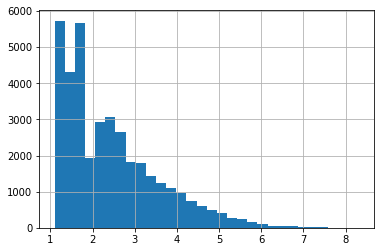

In [142]:
yelp_df['review_count'].apply(np.log).hist(bins=30)

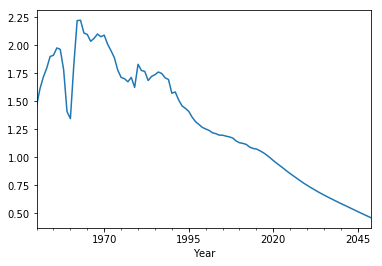

In [131]:
pop_growth['Annual Growth Rate (%)'].plot()

The [plotting functions take many parameters](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for customizing the appearance of the output. Since they are essentially a wrapper around the Matplotlib functions, they also accept many of the Matplotlib parameters, not all of which are listed in the Pandas documentation. Pandas provides [a guide](https://pandas.pydata.org/pandas-docs/stable/visualization.html) to making various plots from DataFrames.

*Copyright &copy; 2017 The Data Incubator.  All rights reserved.*